# Data Cleaning to proceed for Data Visualisation:

In [1]:
import pandas as pd

## Refugees statistics from Syria during the Civil War (2011-2020):

In [3]:
data = pd.read_csv('data.csv')

In [4]:
# Deleting the ID column from the original dataset:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [5]:
data.head(2)

,Year,Country_of_origin,Country_of_origin_(ISO),Country_of_asylum,Country_of_asylum_(ISO),Female_0_-_4,Female_5_-_11,Female_12_-_17,Female_18_-_59,Female_60,Female_total,Male_0_-_4,Male_5_-_11,Male_12_-_17,Male_18_-_59,Male_60,Male_total,Total
0,2001,Syrian Arab Rep.,SYR,Algeria,DZA,0,0,0,0,0,0,0,0,0,0,0,0,8
1,2001,Syrian Arab Rep.,SYR,Egypt,EGY,0,0,0,0,0,0,0,0,0,0,0,8,8


In [6]:
# Converting the dataframe to CSV to do data visualisation in Tableau:
data.to_csv('asylum.csv')

### Getting data from the Civil War years (2011-2020):

In [8]:
syria = data.query('Year > 2010')

In [10]:
# reseting the index:
syria.reset_index(drop=True, inplace=True)

In [11]:
syria.head(2)

,Year,Country_of_origin,Country_of_origin_(ISO),Country_of_asylum,Country_of_asylum_(ISO),Female_0_-_4,Female_5_-_11,Female_12_-_17,Female_18_-_59,Female_60,Female_total,Male_0_-_4,Male_5_-_11,Male_12_-_17,Male_18_-_59,Male_60,Male_total,Total
0,2011,Syrian Arab Rep.,SYR,Algeria,DZA,0,0,0,0,0,0,0,0,0,5,0,5,5
1,2011,Syrian Arab Rep.,SYR,Egypt,EGY,5,0,0,18,0,29,9,0,0,45,0,65,94


### Converting SQL query to CSV and then to Dataframe:

The SQL query was named 'csv_query.csv' and was stored in 'C:\Users\lluis\AppData\Local\Temp\csv_query.csv' (the 'Temp' directory is allowed to export files from MySQL, it is also allowed to use MYSQLDUMP).

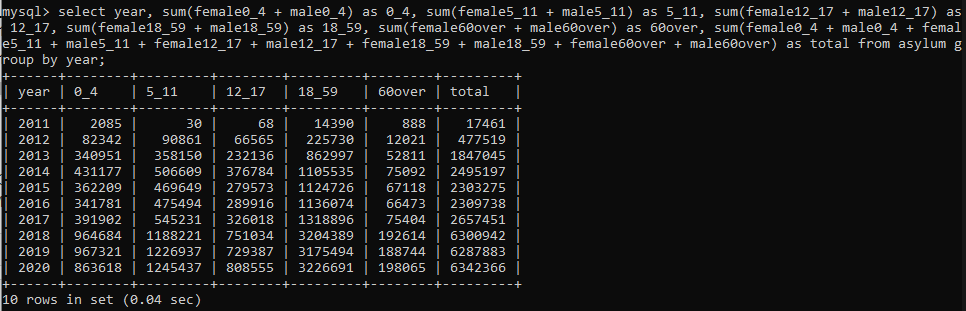

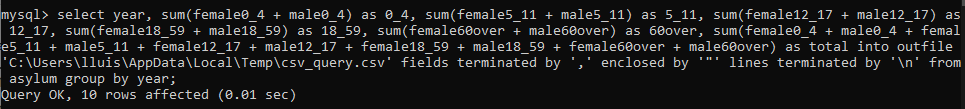

In [12]:
data2 = pd.read_csv('csv_query.csv')

In [14]:
data2 = (pd.concat([data2.columns.to_frame().T, data2], ignore_index=True).set_axis(range(len(data2.columns)), axis=1))

In [15]:
# Arranging the columns:
data2.columns =['year', '0-4 years', '5-11 years', '12-17 years', '18-59 years', '60+ years', 'total']
data2

,year,0-4 years,5-11 years,12-17 years,18-59 years,60+ years,total
0,2011,2085,30,68,14390,888,17461
1,2012,82342,90861,66565,225730,12021,477519
2,2013,340951,358150,232136,862997,52811,1847045
3,2014,431177,506609,376784,1105535,75092,2495197
4,2015,362209,469649,279573,1124726,67118,2303275
5,2016,341781,475494,289916,1136074,66473,2309738
6,2017,391902,545231,326018,1318896,75404,2657451
7,2018,964684,1188221,751034,3204389,192614,6300942
8,2019,967321,1226937,729387,3175494,188744,6287883
9,2020,863618,1245437,808555,3226691,198065,6342366


In [ ]:
# Converting the dataframe to CSV to do data visualisation in Tableau:
data2.to_csv('total_age_groups.csv')

## IDP per Governorates:

We will merge data from a CSV file containing data from 2012 and 2014 with an excel file containing data from 2016 to 2021. The data from the excel file has been previously arranged in the same file so it can be merged with the CSV file directly using Pandas.

In [25]:
excel = pd.read_excel('idp-movements-and-idp-spontaneous-return-movements-data-dec-2021-toshare.xlsx', sheet_name = 'IDP')

In [26]:
excel

,Governorate,2016,2017,2018,2019,2020,2021
0,Aleppo,821865,642694,494190,437874.0,726072.0,195433.0
1,Al-Hasakeh,59506,297408,32016,136773.0,15087.0,13654.0
2,Ar-Raqqa,65314,491081,22490,58101.0,6178.0,817.0
3,As-Sweida,12833,3809,12661,362.0,998.0,NaN
4,Damascus,24579,47053,7479,2409.0,1311.0,398.0
5,Dar'a,226843,125605,130256,NaN,1161.0,43055.0
6,Deir-ez-Zor,42814,253366,26304,51558.0,14576.0,3127.0
7,Hama,146246,105067,15029,2412.0,4506.0,2470.0
8,Homs,63188,25241,4511,13385.0,2426.0,1348.0
9,Idleb,529168,639321,685891,1095958.0,1029661.0,176305.0


In [27]:
data3 = pd.read_csv('idp_governorates.csv')

In [28]:
data3

,Governorate,2012,2014
0,Aleppo,52500.0,1300000
1,Al-Hasakeh,NaN,510000
2,Ar-Raqqa,500000.0,170000
3,As-Sweida,24000.0,73000
4,Damascus,NaN,440000
5,Dar'a,NaN,170000
6,Deir-ez-Zor,NaN,390000
7,Hama,1000.0,350000
8,Homs,250000.0,560000
9,Idleb,21000.0,990000


In [30]:
governorates = pd.merge(data3, excel, on='Governorate', how='outer')

In [31]:
governorates

,Governorate,2012,2014,2016,2017,2018,2019,2020,2021
0,Aleppo,52500.0,1300000,821865,642694,494190,437874.0,726072.0,195433.0
1,Al-Hasakeh,NaN,510000,59506,297408,32016,136773.0,15087.0,13654.0
2,Ar-Raqqa,500000.0,170000,65314,491081,22490,58101.0,6178.0,817.0
3,As-Sweida,24000.0,73000,12833,3809,12661,362.0,998.0,NaN
4,Damascus,NaN,440000,24579,47053,7479,2409.0,1311.0,398.0
5,Dar'a,NaN,170000,226843,125605,130256,NaN,1161.0,43055.0
6,Deir-ez-Zor,NaN,390000,42814,253366,26304,51558.0,14576.0,3127.0
7,Hama,1000.0,350000,146246,105067,15029,2412.0,4506.0,2470.0
8,Homs,250000.0,560000,63188,25241,4511,13385.0,2426.0,1348.0
9,Idleb,21000.0,990000,529168,639321,685891,1095958.0,1029661.0,176305.0


In [32]:
# Converting the dataframe to CSV to do data visualisation in Tableau:
governorates.to_csv('governorates.csv')